<a href="https://colab.research.google.com/github/MohsinAli08000/-COVID-19-Data-Cleaning-and-Visualization-WHO-Dataset-/blob/main/Data_Cleaning_for_a_Real_world_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv('/content/WHO-COVID-19-global-daily-data.csv')

In [53]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AF,Afghanistan,EMR,NaN,0,NaN,0
1,2020-01-04,AL,Albania,EUR,NaN,0,NaN,0
2,2020-01-04,DZ,Algeria,AFR,NaN,0,NaN,0
3,2020-01-04,AS,American Samoa,WPR,0.0,0,0.0,0
4,2020-01-04,AD,Andorra,EUR,NaN,0,NaN,0


In [54]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.078730e+05,4.507200e+05,152814.000000,4.507200e+05
mean,3.740357e+03,1.941942e+06,46.401351,2.099982e+04
std,4.884882e+04,8.235867e+06,243.208622,8.480176e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,3.000000e+00,5.635000e+03,0.000000,3.500000e+01
50%,6.200000e+01,5.228700e+04,2.000000,6.700000e+02
75%,6.910000e+02,6.155348e+05,15.000000,7.574000e+03
max,6.966046e+06,1.034368e+08,44047.000000,1.218325e+06


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450720 entries, 0 to 450719
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      450720 non-null  object 
 1   Country_code       448842 non-null  object 
 2   Country            450720 non-null  object 
 3   WHO_region         450720 non-null  object 
 4   New_cases          207873 non-null  float64
 5   Cumulative_cases   450720 non-null  int64  
 6   New_deaths         152814 non-null  float64
 7   Cumulative_deaths  450720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 27.5+ MB


In [56]:
df.shape

(450720, 8)

In [57]:
df.isnull().sum()

,0
Date_reported,0
Country_code,1878
Country,0
WHO_region,0
New_cases,242847
Cumulative_cases,0
New_deaths,297906
Cumulative_deaths,0


In [58]:
# Converting Date_repoted to Datetime format
df['Date_reported']=pd.to_datetime(df['Date_reported'])

In [59]:
df=df.drop_duplicates()

In [60]:
df['Country_code'] = df.groupby('Country')['Country_code'].transform(lambda x: x.ffill().bfill())
df['Country_code'] = df['Country_code'].infer_objects(copy=False)

<ipython-input-60-3847bf598059>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Country_code'] = df.groupby('Country')['Country_code'].transform(lambda x: x.ffill().bfill())


In [61]:
df[['New_cases', 'New_deaths']] = df[['New_cases', 'New_deaths']].fillna(0)

In [62]:
df['Country']=df['Country'].str.strip()

In [63]:
df['WHO_region']=df['WHO_region'].str.strip()

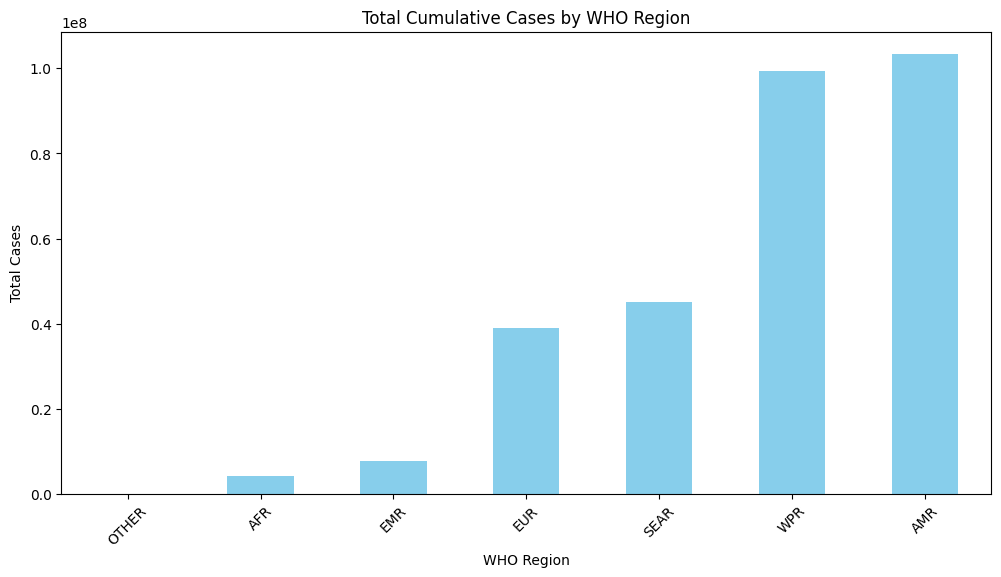

In [67]:
plt.figure(figsize=(12, 6))
total_cases_by_region = df.groupby('WHO_region')['Cumulative_cases'].max().sort_values()
total_cases_by_region.plot(kind='bar', color='skyblue')
plt.title("Total Cumulative Cases by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.show()

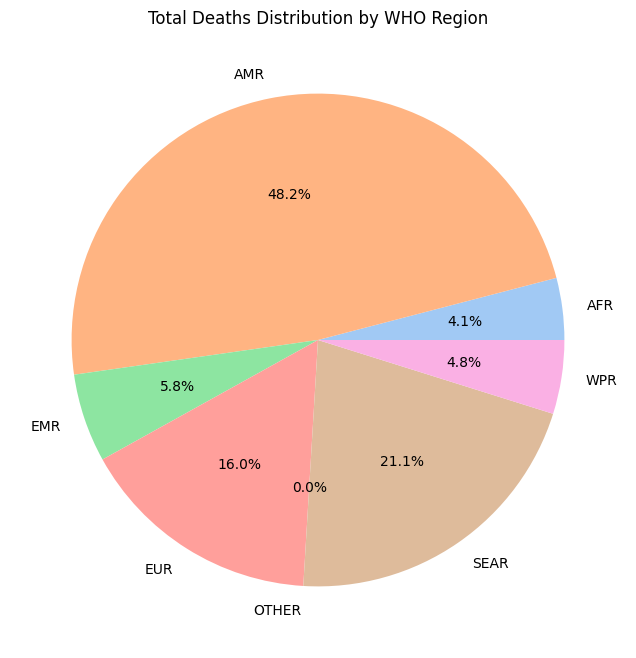

In [68]:
 #Pie Chart of Total Deaths by WHO Region
plt.figure(figsize=(8, 8))
total_deaths_by_region = df.groupby('WHO_region')['Cumulative_deaths'].max()
plt.pie(total_deaths_by_region, labels=total_deaths_by_region.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Total Deaths Distribution by WHO Region")
plt.show()